<a href="https://colab.research.google.com/github/OmarovaJuma/AI.MO/blob/main/Lr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ВИЗУАЛИЗАЦИЯ ДАННЫХ

Выполнила работу Омарова Джума ПИН-б-о-22-1

## **Первичный анализ:**

Основная задача - прогнозирование прочности бетона на сжатие, основным показателем, который обычно используется для построения графиков, будет *Прочность бетона на сжатие (Concrete compressive strength)*. Этот показатель является вашей целевой переменной (выходной переменной) и представляет собой количественное значение в МПа.

**Описание признаков:**

> Цемент (Cement): Количественный, кг в м³, входная переменная.

> Доменный шлак (Blast Furnace Slag): Целое число, кг в м³, входная переменная.

> Летучая зола (Fly Ash): Количественный, кг в м³, входная переменная.

> Вода (Water): Количественный, кг в м³, входная переменная.

> Суперпластификатор (Superplasticizer): Количественный, кг в м³, входная переменная.

> Крупный заполнитель (Coarse Aggregate): Количественный, кг в м³, входная переменная.

> Мелкий заполнитель (Fine Aggregate): Количественный, кг в м³, входная переменная.

> Возраст (Age): Целое число, сутки (1-365), входная переменная.

> Прочность бетона на сжатие (Concrete compressive strength): Цель, МПа, выходная переменная.

**Статистические характеристики:**

Количество элементов набора данных: 1030

Количество признаков: 9

Количество пропущенных элементов: Нет



**Средние, максимальные и минимальные значения для каждого признака:**

In [ ]:
# Вычисление средних значений
сement = data.mean()

print("Средние значения:")
print(сement)

Средние значения:
Cement                           281.165631
Blast Furnace Slag                73.895485
Fly Ash                           54.187136
Water                            181.566359
Superplasticizer                   6.203112
Coarse Aggregate                 972.918592
Fine Aggregate                   773.578883
Age                               45.662136
Concrete Compressive Strength     35.817836
dtype: float64


In [ ]:
# Вычисление максимальных значений
max_сement = data.max()

print("\nМаксимальные значения:")
print(max_сement)


Максимальные значения:
Cement                            540.000000
Blast Furnace Slag                359.400000
Fly Ash                           200.100000
Water                             247.000000
Superplasticizer                   32.200000
Coarse Aggregate                 1145.000000
Fine Aggregate                    992.600000
Age                               365.000000
Concrete Compressive Strength      82.599225
dtype: float64


In [ ]:
# Вычисление минимальных значений
min_сement = data.min()

print("\nМинимальные значения:")
print(min_сement)


Минимальные значения:
Cement                           102.000000
Blast Furnace Slag                 0.000000
Fly Ash                            0.000000
Water                            121.750000
Superplasticizer                   0.000000
Coarse Aggregate                 801.000000
Fine Aggregate                   594.000000
Age                                1.000000
Concrete Compressive Strength      2.331808
dtype: float64


Импортируем библиотеки Python для анализа и визуализации данных

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools

Загружает данные из файла Excel (.xls) по указанному пути dataset/Concrete_Data.xls с помощью библиотеки Pandas. После загрузки данных в переменную data, функция head() вызывается для показа первых пяти строк данных из файла Excel, чтобы дать представление о структуре и содержании данных.

In [ ]:
data_path = "dataset/Concrete_Data.xls"
data = pd.read_excel(data_path)
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Метод data.info() возвращает информацию о датасете, включая количество записей, количество столбцов, типы данных для каждого столбца и общее количество ненулевых значений в каждом столбце. Это помогает понять общую структуру данных и выявить наличие отсутствующих значений.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Задаем признаки для построения гистограмм.

In [ ]:
# Указанные признаки
features = ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
            'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)',
            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
            'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']

Задем словарь short_names, который сопоставляет полные названия признаков с их сокращенными версиями.

In [ ]:
# Словарь для сопоставления полных названий признаков с сокращенными
short_names = {
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
    'Age (day)': 'Age',
    'Concrete compressive strength(MPa, megapascals) ': 'Concrete Compressive Strength'
}

Строим гистограммы для каждого признака в наборе данных.

Цикл for feature in features: перебирает все признаки в списке features.

plt.figure(figsize=(3, 3)) создает новое окно для графика с размером 3 на 3 дюйма.

plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black') строит гистограмму для признака feature. Аргумент data[feature] передает данные для построения гистограммы. Аргумент bins=20 задает количество столбцов в гистограмме. Аргумент color='skyblue' задает цвет столбцов. Аргумент edgecolor='black' задает цвет границ столбцов.

plt.xlabel(short_names[feature]) задает метку оси X. Метка берется из словаря short_names, который сопоставляет каждому признаку его короткое имя.

plt.ylabel('Частота') задает метку оси Y.

plt.title(f'Гистограмма для признака "{short_names[feature]}"') задает заголовок графика.

plt.grid(True) включает отображение сетки на графике.

plt.show() отображает график.

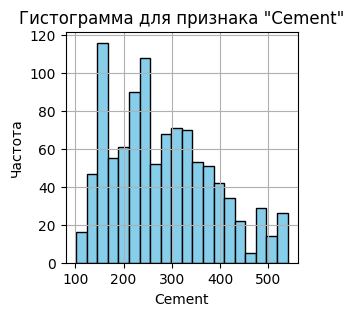

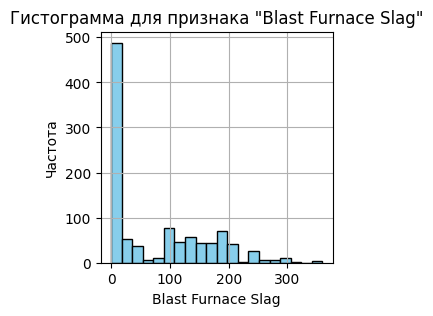

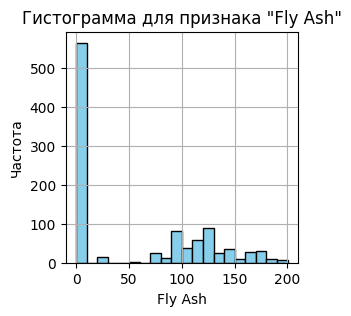

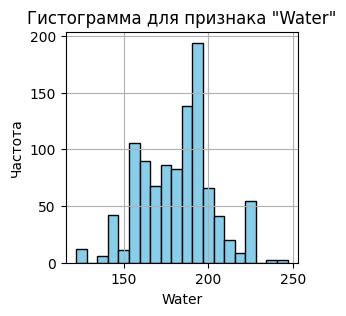

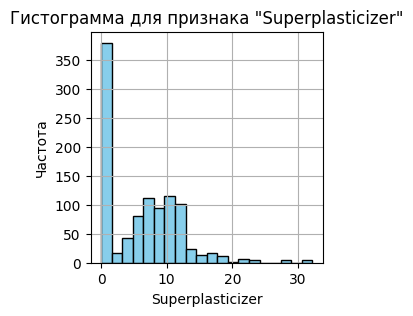

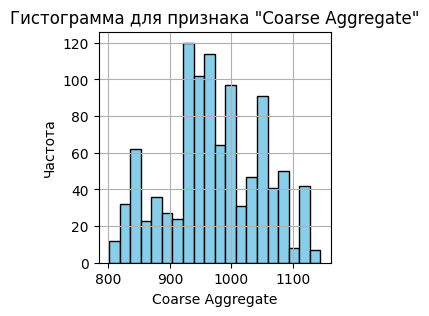

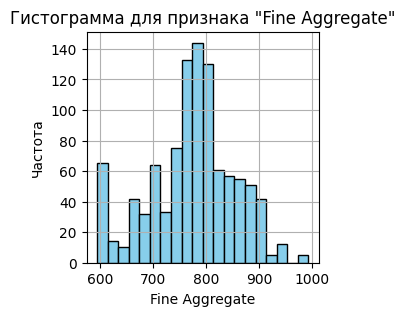

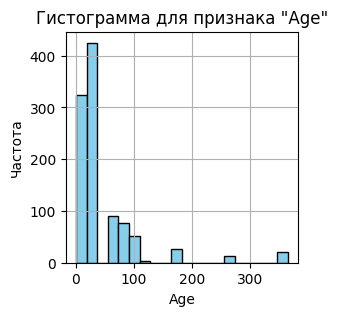

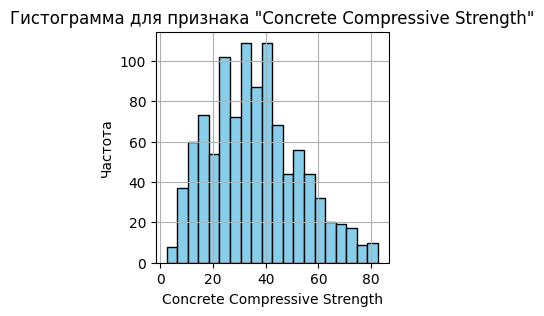

In [ ]:
# Построение гистограмм для каждого признака
for feature in features:
    plt.figure(figsize=(3, 3))
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(short_names[feature])
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для признака "{short_names[feature]}"')
    plt.grid(True)
    plt.show()

Строим диаграммы "ящик с усами" для каждого признака в наборе данных.

Цикл for feature in features: перебирает все признаки в списке features.

plt.figure(figsize=(3, 3)) создает новое окно для графика с размером 3 на 3 дюйма.

sns.boxplot(x=feature, data=data, color='skyblue') строит диаграмму "ящик с усами" для признака feature. Аргумент x=feature задает признак, по которому строится диаграмма. Аргумент data=data передает данные для построения диаграммы. Аргумент color='skyblue' задает цвет диаграммы.

plt.title(f"Ящик с усами для признака '{short_names[feature]}'") задает заголовок графика.

plt.xlabel(short_names[feature]) задает метку оси X. Метка берется из словаря short_names, который сопоставляет каждому признаку его короткое имя.

plt.ylabel('Значение') задает метку оси Y.

plt.grid(True) включает отображение сетки на графике.

plt.show() отображает график.

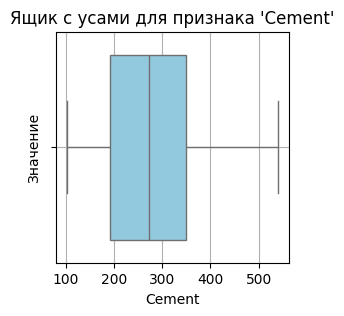

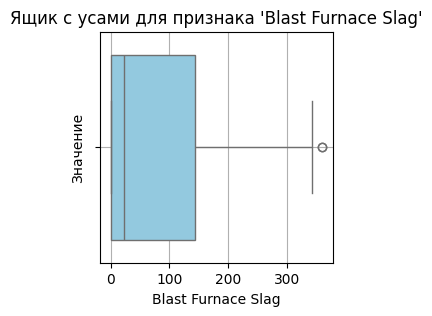

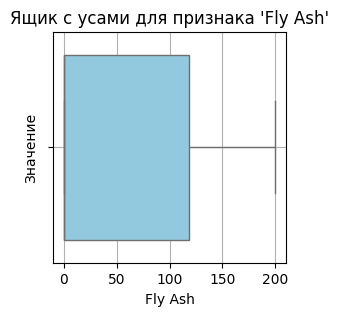

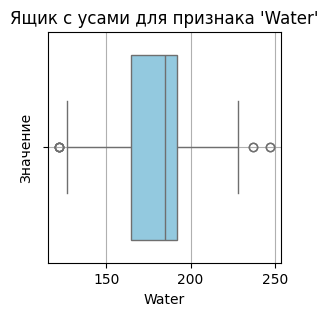

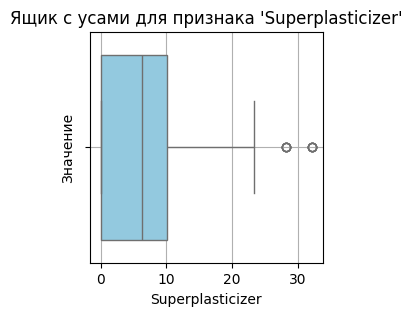

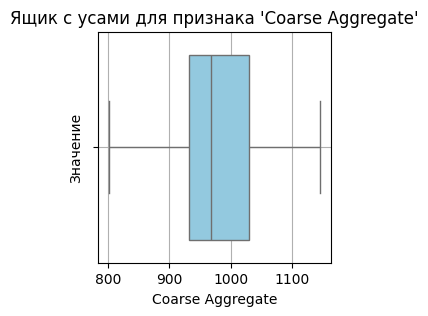

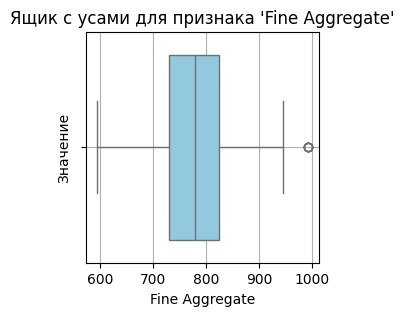

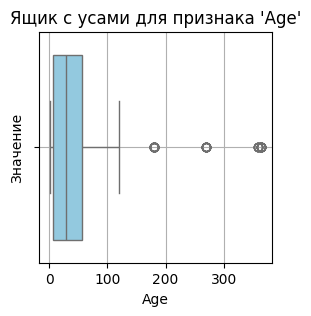

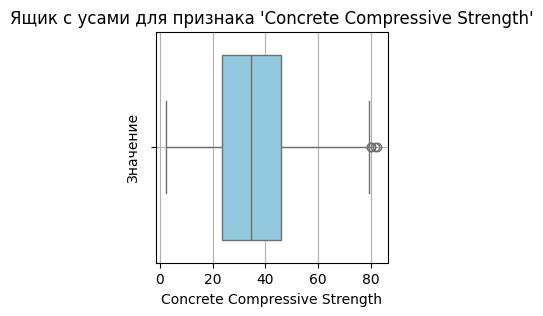

In [ ]:
# Построение "ящика с усами" для каждого признака
for feature in features:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x=feature, data=data, color='skyblue')
    plt.title(f"Ящик с усами для признака '{short_names[feature]}'")
    plt.xlabel(short_names[feature])
    plt.ylabel('Значение')
    plt.grid(True)
    plt.show()

Отбираем числовые признаки из набора данных, которые содержат слово "Aggregate" в своем имени.

aggregate_columns = [col for col in data.columns if 'aggregate' in col.lower() and data[col].dtype in ['int64', 'float64']] создает список aggregate_columns, который содержит имена числовых признаков, содержащих слово "Aggregate" в своем имени.

[col for col in data.columns if 'aggregate' in col.lower()] создает список имен всех признаков, содержащих слово "Aggregate" в своем имени.

data[col].dtype in ['int64', 'float64'] проверяет, является ли тип данных признака col числовым (целочисленным или вещественным).

print(data[aggregate_columns]) выводит на экран значения отобранных признаков.

In [ ]:
# Отбор числовых признаков, содержащих слово "Aggregate"
aggregate_columns = [col for col in data.columns if 'aggregate' in col.lower() and data[col].dtype in ['int64', 'float64']]

# Вывод отобранных признаков
print(data[aggregate_columns])

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                              989.6      
1029                                              864.5      

      Fine Aggregate (component 7)(kg in a m^3 mixture)  
0                                                 676.0  
1                                                 676.0  
2                                                 594.0  
3                      

Создаем гистограммы для выбранных столбцов в наборе данных data.

for col in aggregate_columns: Этот цикл перебирает каждый столбец из списка aggregate_columns, который, вероятно, содержит столбцы, отобранные для анализа.

plt.figure(figsize=(6, 4)): Эта строка создает новую фигуру Matplotlib с указанным размером. Размер фигуры задается в дюймах, поэтому (6, 4) создает фигуру шириной 6 дюймов и высотой 4 дюйма.

plt.hist(data[col], bins=20, color='skyblue', edgecolor='black'): Эта строка создает гистограмму для данных в столбце col из набора данных data.

bins=20: указывает количество равномерно распределенных интервалов (бин) для гистограммы. В данном случае будет создано 20 интервалов.
color='skyblue': задает цвет столбцов гистограммы.
edgecolor='black': задает цвет границ столбцов гистограммы.
plt.xlabel(short_names[col]): Эта строка задает метку оси x гистограммы значением из словаря short_names, соответствующим столбцу col.

plt.ylabel('Частота'): Эта строка задает метку оси y гистограммы как "Частота".

plt.title(f'Гистограмма для признака "{short_names[col]}"'): Эта строка задает заголовок гистограммы, используя значение из словаря short_names для столбца col.

plt.grid(True): Эта строка включает сетку на гистограмме.

plt.show(): Эта строка отображает гистограмму в окне Matplotlib.

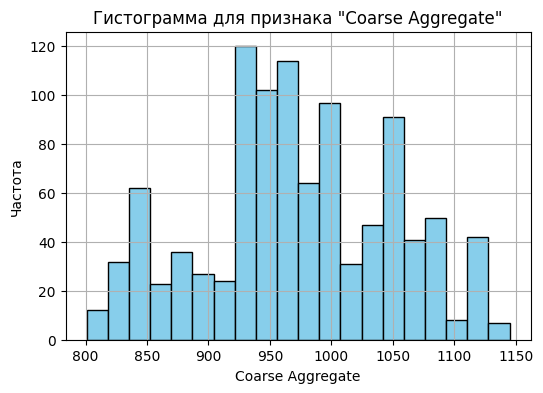

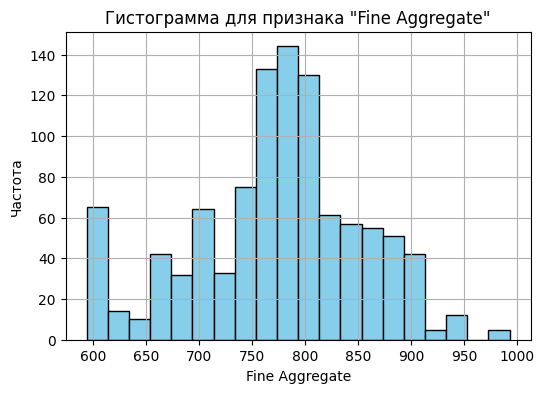

In [ ]:
# Вывод отобранных признаков
for col in aggregate_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(short_names[col])
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для признака "{short_names[col]}"')
    plt.grid(True)
    plt.show()

Построим матрицы диаграмм рассеяния для выбранных столбцов в наборе данных data.

aggregate_data = data[aggregate_columns]: Эта строка создает новый DataFrame aggregate_data, который содержит только столбцы из списка aggregate_columns.

aggregate_data = aggregate_data.rename(columns=short_names): Эта строка переименовывает столбцы в aggregate_data в соответствии со значениями в словаре short_names. Это позволяет использовать более короткие и понятные имена столбцов в матрице рассеяния.

sns.pairplot(aggregate_data, height=5): Эта строка создает матрицу диаграмм рассеяния для столбцов в aggregate_data.

height=5: задает высоту каждой диаграммы рассеяния в матрице в дюймах.
plt.suptitle('Матрица диаграмм рассеяния для отобранных признаков', y=1.02): Эта строка задает заголовок для матрицы рассеяния.

y=1.02: задает вертикальное положение заголовка относительно верхней части графика.

plt.show(): Эта строка отображает матрицу рассеяния в окне Matplotlib.

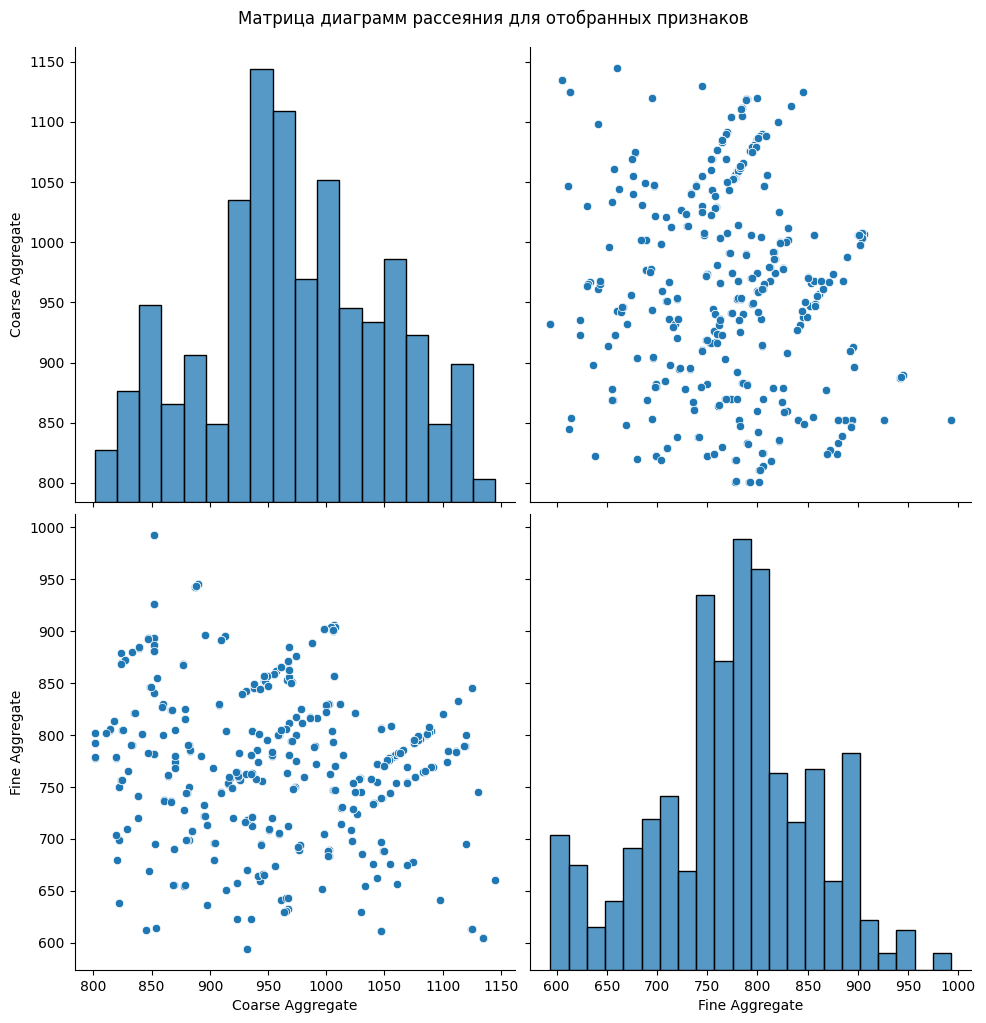

In [ ]:
# Создание DataFrame с отобранными признаками
aggregate_data = data[aggregate_columns]

# Переименование столбцов в соответствии с short_names
aggregate_data = aggregate_data.rename(columns=short_names)

# Построение матрицы диаграмм рассеяния
sns.pairplot(aggregate_data, height=5)
plt.suptitle('Матрица диаграмм рассеяния для отобранных признаков', y=1.02)
plt.show()

Создаем точечную диаграмму для всех возможных пар признаков (комбинаций двух признаков), используя библиотеку itertools для генерации этих пар. Для каждой пары признаков код строит точечную диаграмму, где горизонтальная ось соответствует одному признаку из пары, а вертикальная ось - другому.

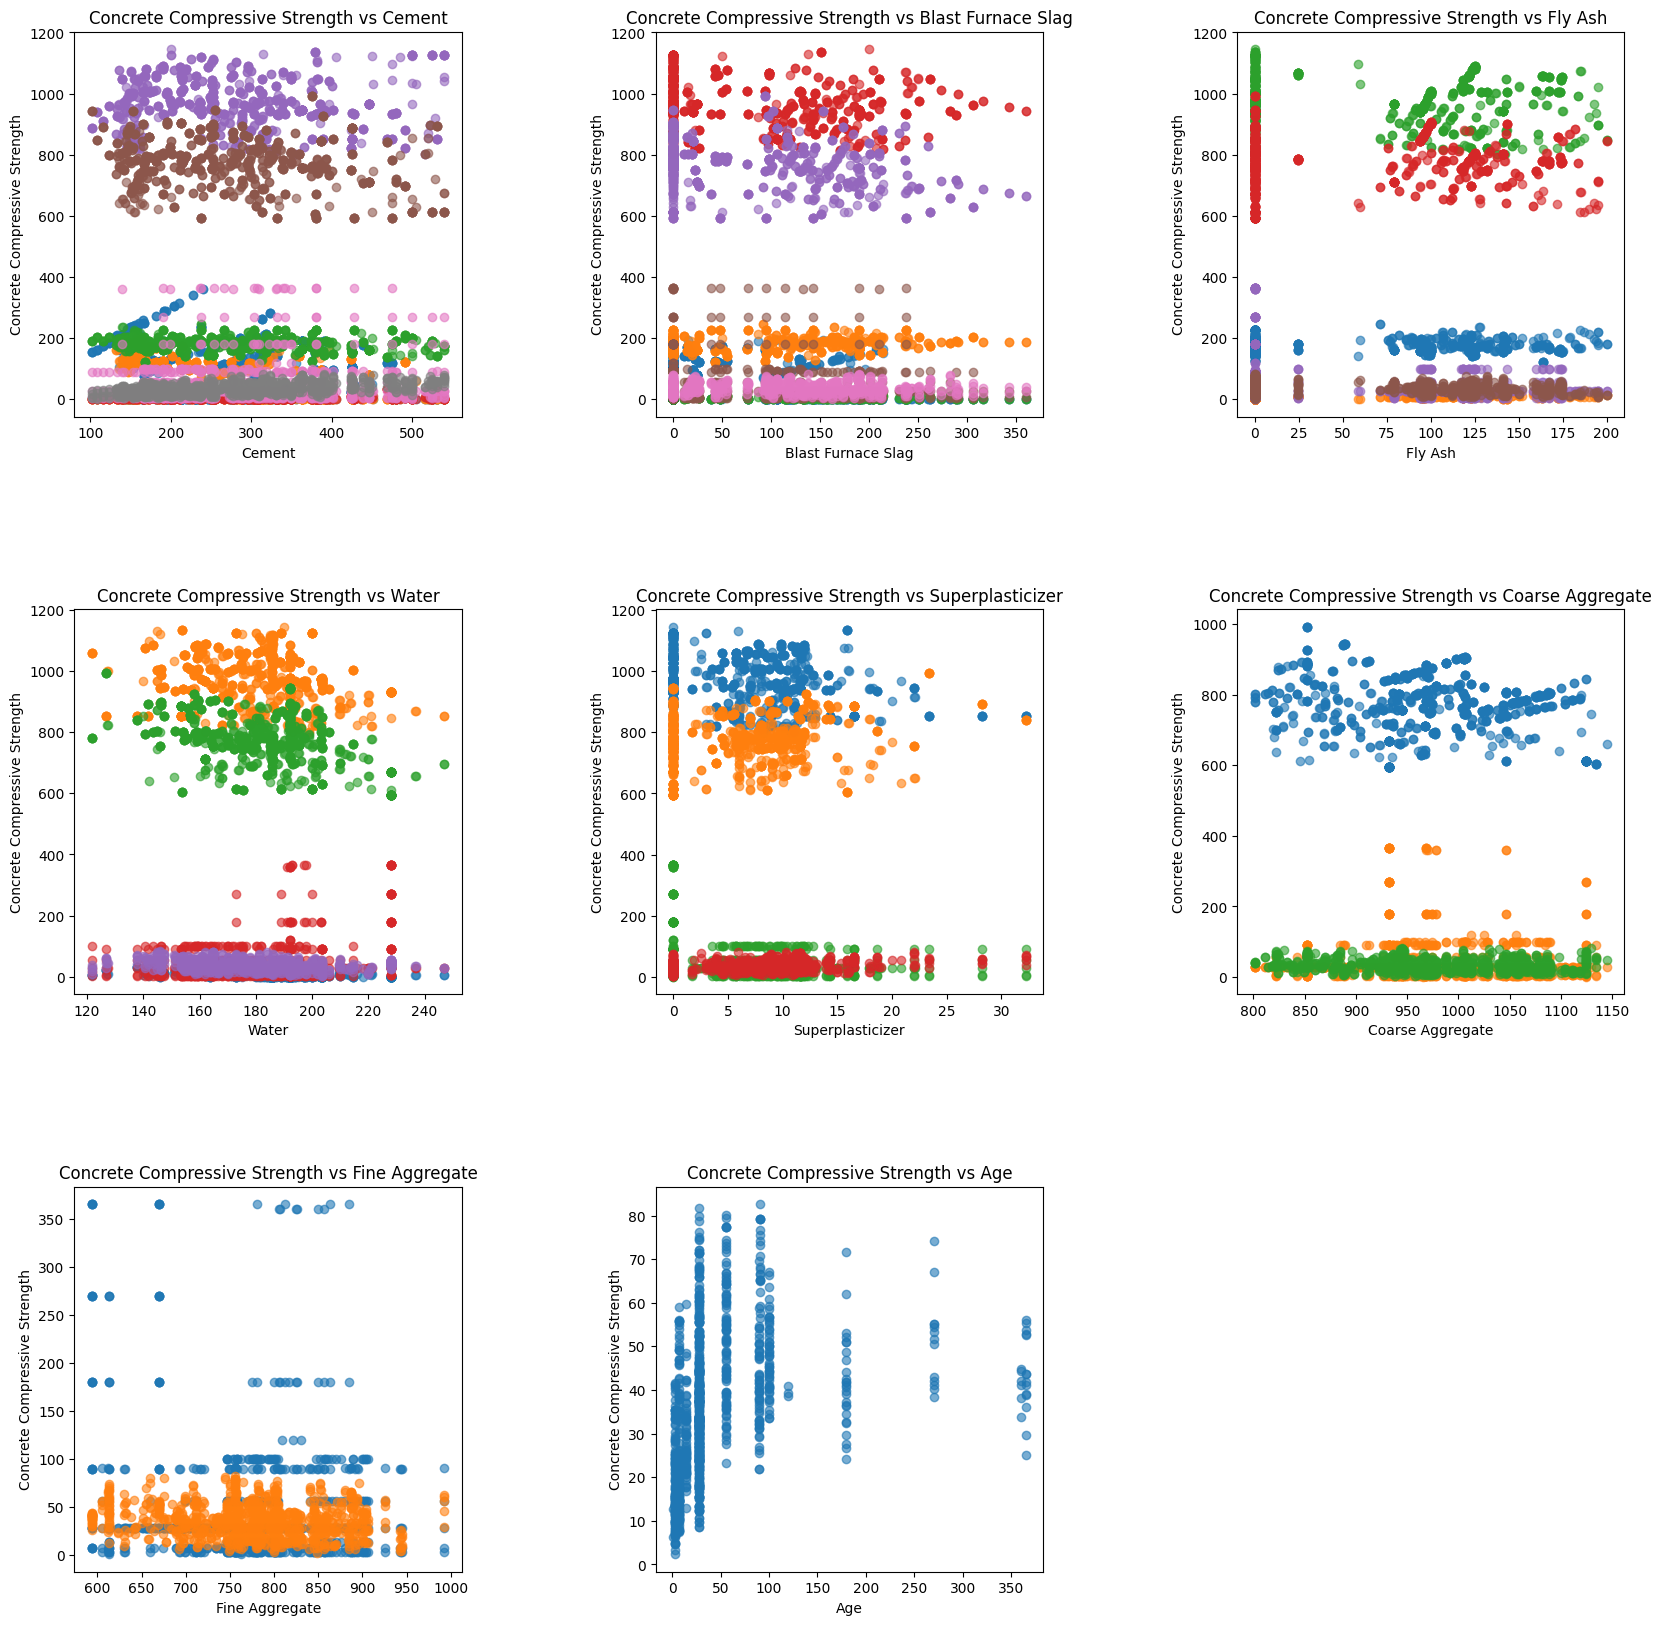

In [ ]:
# Переименование столбцов
new_column_names = ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
            'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)',
            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
            'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']

data.columns = new_column_names

# Создание scatter plot для всех возможных комбинаций признаков
plt.figure(figsize=(20, 20))
for pair in itertools.combinations(features, 2):
    x_feature = pair[0]
    y_feature = pair[1]

    plt.subplot(3, 3, features.index(x_feature) + 1)
    plt.scatter(data[x_feature], data[y_feature], alpha=0.6)
    plt.title(f'{short_names[y_feature]} vs {short_names[x_feature]}')
    plt.xlabel(short_names[x_feature])
    plt.ylabel(short_names[y_feature])

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Добавление расстояния между графиками

plt.show()

Создаем и визуализирует матрицу корреляции с данными о бетоне. Матрица корреляции показывает степень линейной связи между каждой парой переменных в наборе данных. Библиотека seaborn используется для создания тепловой карты матрицы корреляции, где цвета ячеек показывают значение корреляции между двумя переменными.

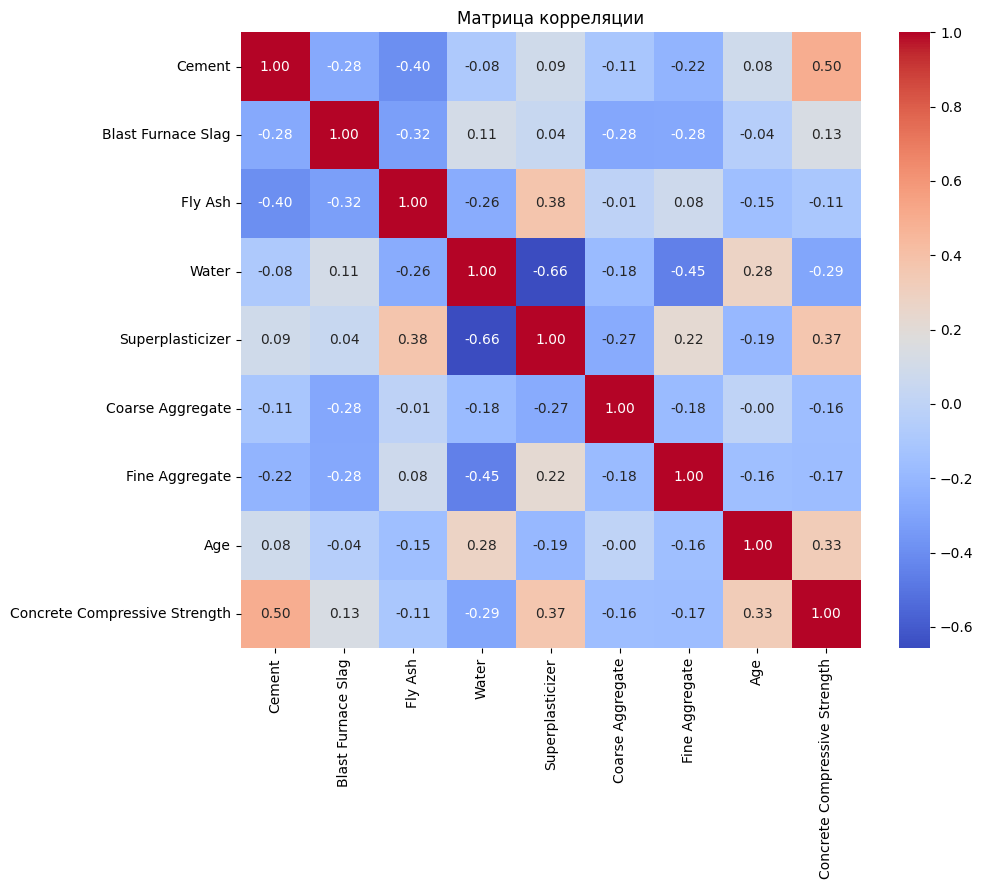

In [ ]:
# Вычисление матрицы корреляции
corr_matrix = data.corr()

# Визуализация матрицы корреляции с использованием графика тип heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

1. **Инструментальные средства для организации рабочего места специалиста Data Science:**
   - **Jupyter Notebook**: интерактивная среда для разработки и документирования кода.
   - **Anaconda**: дистрибутив Python, включающий множество библиотек для Data Science и управление окружениями.
   - **IDE (например, PyCharm, VS Code)**: инструменты для написания и отладки кода.
   - **Git**: система контроля версий для управления проектами.
   - **Docker**: для контейнеризации приложений и обеспечения совместимости окружений.

2. **Библиотеки Python для машинного обучения:**
   - **NumPy**: библиотека для работы с многомерными массивами и матрицами, предоставляет функции для выполнения математических операций.
   - **Pandas**: предназначена для манипуляций с данными, предоставляет структуры данных и функции для анализа данных.
   - **Scikit-learn**: библиотека для машинного обучения, включает алгоритмы классификации, регрессии и кластеризации, а также инструменты для предобработки данных.
   - **TensorFlow**: фреймворк для разработки и тренировки нейронных сетей, поддерживает как CPU, так и GPU.
   - **Keras**: высокоуровневый API для TensorFlow, упрощает создание и обучение нейронных сетей.
   - **Matplotlib**: библиотека для визуализации данных, позволяет создавать графики и диаграммы.

3. **Причины популярности библиотек Python в машинном обучении:**
   - **Простота и читаемость кода**: Python имеет простой синтаксис, что облегчает обучение и использование.
   - **Большое сообщество**: активное сообщество разработчиков, которое создает и поддерживает множество библиотек.
   - **Многофункциональность**: поддержка различных областей, таких как веб-разработка, автоматизация, анализ данных и машинное обучение.
   - **Интеграция с другими инструментами**: возможность легко интегрироваться с другими языками и инструментами.

4. **Функции Python для визуализации данных:**
   - **matplotlib.pyplot**: функции для создания различных типов графиков (line, bar, scatter и др.).
   - **seaborn**: расширение Matplotlib для более сложной визуализации и статистического анализа.
   - **plotly**: библиотека для создания интерактивных графиков.

5. **Библиотека для управления наборами данных:**
   - **Pandas**.

6. **Нежелательная стратегия при обработке пропусков:**
   - **б)** удаление строк, содержащих пропуски в данных.

7. **Обоснование использования OneHotEncoder для категориального признака:**
   - OneHotEncoder следует применять, если категориальный признак является независимым и не имеет порядковой зависимости. Это позволяет избежать проблем с интерпретацией значений.

8. **Принцип разбиения набора данных на обучающую и тестовую выборку:**
   - Данные делятся на две части: обучающую (для тренировки модели) и тестовую (для оценки ее качества). Оптимальное соотношение зависит от задачи, но часто используется 80:20 или 75:25. Из предложенных вариантов наиболее оптимально 80:20.

9. **Лучший код для загрузки данных из csv-файла:**
   - **а)** `dataset = read_csv(“data.csv”)` (при условии, что используется библиотека pandas).